***
### <span style="color:navy">**Water Quality Analysis:**</span>
***

### **Data Acquisition**
Tools installation and importing of data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
plank = pd.read_csv('./Phytoplankton.csv')

In [3]:
plank

,Phytoplankton Monitoring Programme results,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,Sample number,Production area,Bed ID,Local authority,Grid reference\n\nNote 1,Sampling point,Date sample collected,Alexandrium spp. \ncells L-1\n(PSP),Dinophysiaceae \ncells L-1\n(DSP),Prorocentrum lima \ncells L-1\n(DSP),Pseudo-nitzschia spp. \ncells L-1\n(ASP),Ligulodinium polyedrum \ncells L-1\n(Yessotoxin),Protoceratium reticulatum \ncells L-1\n(Yessot...,Prorocentrum cordatum \ncells L-1\n(Venerupin)
1,1/21,Solent,B24BK,Southampton PHA,SZ57479794,Browndown,04/01/2021,ND,ND,ND,ND,ND,ND,ND
2,2/21,Southampton Water,B21AT,Southampton PHA,SU48760530,Hamble Estuary,04/01/2021,ND,ND,ND,ND,ND,ND,ND
3,3/21,Brancaster,B05AS,Kings Lynn & W Norfolk BC,TF79884539,Norton Creek Mussels,05/01/2021,ND,ND,ND,400,ND,ND,ND
4,4/21,Porlock,B094D,Somerset West and Taunton Council,SS87114787,Porlock East,05/01/2021,ND,ND,ND,ND,ND,ND,ND
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
865,895/21,Milford Haven,B39CZ,Pembrokeshire CC,SM89000275,Tethys Oyster,10/11/2021,ND,ND,ND,ND,ND,ND,ND
866,896/21,Exe,B26BH,Teignbridge DC,SX97948072,Cockwood Harbour,10/11/2021,ND,ND,ND,ND,ND,ND,200
867,897/21,Teign,B27AC,Teignbridge DC,SX92827284,Gas Works East,10/11/2021,ND,ND,ND,240,ND,ND,ND
868,898/21,Dee,B45AB,Flintshire CC,SJ17568056,Salisbury,11/11/2021,ND,ND,ND,ND,ND,ND,ND


In [4]:
new_header = plank.iloc[0] #grab the first row for the header
plank = plank[1:] #take the data less the header row
plank.columns = new_header #set the header row as the df header
plank = plank[:828]

In [5]:
plank

,Sample number,Production area,Bed ID,Local authority,Grid reference\n\nNote 1,Sampling point,Date sample collected,Alexandrium spp. \ncells L-1\n(PSP),Dinophysiaceae \ncells L-1\n(DSP),Prorocentrum lima \ncells L-1\n(DSP),Pseudo-nitzschia spp. \ncells L-1\n(ASP),Ligulodinium polyedrum \ncells L-1\n(Yessotoxin),Protoceratium reticulatum \ncells L-1\n(Yessotoxin),Prorocentrum cordatum \ncells L-1\n(Venerupin)
1,1/21,Solent,B24BK,Southampton PHA,SZ57479794,Browndown,04/01/2021,ND,ND,ND,ND,ND,ND,ND
2,2/21,Southampton Water,B21AT,Southampton PHA,SU48760530,Hamble Estuary,04/01/2021,ND,ND,ND,ND,ND,ND,ND
3,3/21,Brancaster,B05AS,Kings Lynn & W Norfolk BC,TF79884539,Norton Creek Mussels,05/01/2021,ND,ND,ND,400,ND,ND,ND
4,4/21,Porlock,B094D,Somerset West and Taunton Council,SS87114787,Porlock East,05/01/2021,ND,ND,ND,ND,ND,ND,ND
5,5/21,Blackwater,B14AD,Maldon DC,TM04060768,St Peters Flats,06/01/2021,ND,ND,ND,ND,ND,ND,ND
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824,853/21,St Austell Bay,B70AE,Cornwall PHA,SX05744972,Ropehaven Outer,25/10/2021,ND,40,ND,7080,ND,ND,ND
825,854/21,Crouch,B015Y,Maldon DC,TQ90429738,Althorne,26/10/2021,ND,ND,ND,ND,ND,ND,ND
826,855/21,Lyme Bay,B090M,Torbay BC,UNVERIFIED,Site 1,25/10/2021,ND,40,ND,ND,ND,ND,ND
827,856/21,Burry Inlet,B038I,City and Council of Swansea,SS50509590,South East 4,27/10/2021,ND,ND,ND,ND,ND,ND,ND


## <span style="color:navy">1. Data cleaning </span>

In [6]:
plank.columns

Index(['Sample number', 'Production area', 'Bed ID', 'Local authority',
       'Grid reference\n\nNote 1             ', 'Sampling point',
       'Date sample collected', 'Alexandrium spp. \ncells L-1\n(PSP)',
       'Dinophysiaceae \ncells L-1\n(DSP)',
       'Prorocentrum lima \ncells L-1\n(DSP)',
       'Pseudo-nitzschia spp. \ncells L-1\n(ASP) ',
       'Ligulodinium polyedrum \ncells L-1\n(Yessotoxin)',
       'Protoceratium reticulatum \ncells L-1\n(Yessotoxin) ',
       'Prorocentrum cordatum \ncells L-1\n(Venerupin) '],
      dtype='object', name=0)

In [7]:
plank

,Sample number,Production area,Bed ID,Local authority,Grid reference\n\nNote 1,Sampling point,Date sample collected,Alexandrium spp. \ncells L-1\n(PSP),Dinophysiaceae \ncells L-1\n(DSP),Prorocentrum lima \ncells L-1\n(DSP),Pseudo-nitzschia spp. \ncells L-1\n(ASP),Ligulodinium polyedrum \ncells L-1\n(Yessotoxin),Protoceratium reticulatum \ncells L-1\n(Yessotoxin),Prorocentrum cordatum \ncells L-1\n(Venerupin)
1,1/21,Solent,B24BK,Southampton PHA,SZ57479794,Browndown,04/01/2021,ND,ND,ND,ND,ND,ND,ND
2,2/21,Southampton Water,B21AT,Southampton PHA,SU48760530,Hamble Estuary,04/01/2021,ND,ND,ND,ND,ND,ND,ND
3,3/21,Brancaster,B05AS,Kings Lynn & W Norfolk BC,TF79884539,Norton Creek Mussels,05/01/2021,ND,ND,ND,400,ND,ND,ND
4,4/21,Porlock,B094D,Somerset West and Taunton Council,SS87114787,Porlock East,05/01/2021,ND,ND,ND,ND,ND,ND,ND
5,5/21,Blackwater,B14AD,Maldon DC,TM04060768,St Peters Flats,06/01/2021,ND,ND,ND,ND,ND,ND,ND
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824,853/21,St Austell Bay,B70AE,Cornwall PHA,SX05744972,Ropehaven Outer,25/10/2021,ND,40,ND,7080,ND,ND,ND
825,854/21,Crouch,B015Y,Maldon DC,TQ90429738,Althorne,26/10/2021,ND,ND,ND,ND,ND,ND,ND
826,855/21,Lyme Bay,B090M,Torbay BC,UNVERIFIED,Site 1,25/10/2021,ND,40,ND,ND,ND,ND,ND
827,856/21,Burry Inlet,B038I,City and Council of Swansea,SS50509590,South East 4,27/10/2021,ND,ND,ND,ND,ND,ND,ND


In [8]:
plank.isnull().sum()

0
Sample number                                           0
Production area                                         1
Bed ID                                                  1
Local authority                                         0
Grid reference\n\nNote 1                                1
Sampling point                                          0
Date sample collected                                   0
Alexandrium spp. \ncells L-1\n(PSP)                     0
Dinophysiaceae \ncells L-1\n(DSP)                       1
Prorocentrum lima \ncells L-1\n(DSP)                    1
Pseudo-nitzschia spp. \ncells L-1\n(ASP)                1
Ligulodinium polyedrum \ncells L-1\n(Yessotoxin)        1
Protoceratium reticulatum \ncells L-1\n(Yessotoxin)     0
Prorocentrum cordatum \ncells L-1\n(Venerupin)          0
dtype: int64

In [9]:
def clean_data(df):
    #Replaces 'ND@ values with 0
    df["Alexandrium spp. \ncells L-1\n(PSP)"] = df["Alexandrium spp. \ncells L-1\n(PSP)"].replace("ND", 0)
    df["Pseudo-nitzschia spp. \ncells L-1\n(ASP) "] = df["Pseudo-nitzschia spp. \ncells L-1\n(ASP) "].replace("ND", 0)
    df["Dinophysiaceae \ncells L-1\n(DSP)"] = df["Dinophysiaceae \ncells L-1\n(DSP)"].replace("ND", 0)
    df["Prorocentrum lima \ncells L-1\n(DSP)"] = df["Prorocentrum lima \ncells L-1\n(DSP)"].replace("ND", 0)
    
    #Makes all entries to be numeric
    df["Alexandrium spp. \ncells L-1\n(PSP)"] = pd.to_numeric(df["Alexandrium spp. \ncells L-1\n(PSP)"], errors='coerce')
    df["Pseudo-nitzschia spp. \ncells L-1\n(ASP) "] = pd.to_numeric(df["Pseudo-nitzschia spp. \ncells L-1\n(ASP) "], errors='coerce')
    df["Dinophysiaceae \ncells L-1\n(DSP)"] = pd.to_numeric(df["Dinophysiaceae \ncells L-1\n(DSP)"], errors='coerce')
    df["Prorocentrum lima \ncells L-1\n(DSP)"] = pd.to_numeric(df["Prorocentrum lima \ncells L-1\n(DSP)"], errors='coerce')
    
    #replaces negative values with null
    df["Alexandrium spp. \ncells L-1\n(PSP)"] = df["Alexandrium spp. \ncells L-1\n(PSP)"].fillna(-1)
    df["Pseudo-nitzschia spp. \ncells L-1\n(ASP) "] = df["Pseudo-nitzschia spp. \ncells L-1\n(ASP) "].fillna(-1)
    df["Dinophysiaceae \ncells L-1\n(DSP)"] = df["Dinophysiaceae \ncells L-1\n(DSP)"].fillna(-1)
    df["Prorocentrum lima \ncells L-1\n(DSP)"] = df["Prorocentrum lima \ncells L-1\n(DSP)"].fillna(-1)

In [10]:
clean_data(plank)

In [11]:
plank

,Sample number,Production area,Bed ID,Local authority,Grid reference\n\nNote 1,Sampling point,Date sample collected,Alexandrium spp. \ncells L-1\n(PSP),Dinophysiaceae \ncells L-1\n(DSP),Prorocentrum lima \ncells L-1\n(DSP),Pseudo-nitzschia spp. \ncells L-1\n(ASP),Ligulodinium polyedrum \ncells L-1\n(Yessotoxin),Protoceratium reticulatum \ncells L-1\n(Yessotoxin),Prorocentrum cordatum \ncells L-1\n(Venerupin)
1,1/21,Solent,B24BK,Southampton PHA,SZ57479794,Browndown,04/01/2021,0.0,0.0,0.0,0.0,ND,ND,ND
2,2/21,Southampton Water,B21AT,Southampton PHA,SU48760530,Hamble Estuary,04/01/2021,0.0,0.0,0.0,0.0,ND,ND,ND
3,3/21,Brancaster,B05AS,Kings Lynn & W Norfolk BC,TF79884539,Norton Creek Mussels,05/01/2021,0.0,0.0,0.0,400.0,ND,ND,ND
4,4/21,Porlock,B094D,Somerset West and Taunton Council,SS87114787,Porlock East,05/01/2021,0.0,0.0,0.0,0.0,ND,ND,ND
5,5/21,Blackwater,B14AD,Maldon DC,TM04060768,St Peters Flats,06/01/2021,0.0,0.0,0.0,0.0,ND,ND,ND
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824,853/21,St Austell Bay,B70AE,Cornwall PHA,SX05744972,Ropehaven Outer,25/10/2021,0.0,40.0,0.0,7080.0,ND,ND,ND
825,854/21,Crouch,B015Y,Maldon DC,TQ90429738,Althorne,26/10/2021,0.0,0.0,0.0,0.0,ND,ND,ND
826,855/21,Lyme Bay,B090M,Torbay BC,UNVERIFIED,Site 1,25/10/2021,0.0,40.0,0.0,0.0,ND,ND,ND
827,856/21,Burry Inlet,B038I,City and Council of Swansea,SS50509590,South East 4,27/10/2021,0.0,0.0,0.0,0.0,ND,ND,ND


In [12]:
plank.isnull().sum()

0
Sample number                                           0
Production area                                         1
Bed ID                                                  1
Local authority                                         0
Grid reference\n\nNote 1                                1
Sampling point                                          0
Date sample collected                                   0
Alexandrium spp. \ncells L-1\n(PSP)                     0
Dinophysiaceae \ncells L-1\n(DSP)                       0
Prorocentrum lima \ncells L-1\n(DSP)                    0
Pseudo-nitzschia spp. \ncells L-1\n(ASP)                0
Ligulodinium polyedrum \ncells L-1\n(Yessotoxin)        1
Protoceratium reticulatum \ncells L-1\n(Yessotoxin)     0
Prorocentrum cordatum \ncells L-1\n(Venerupin)          0
dtype: int64

In [13]:
plank["Alexandrium spp. \ncells L-1\n(PSP)"].value_counts()

 0.0      770
-1.0       19
 40.0      16
 200.0      7
 100.0      6
 120.0      2
 500.0      2
 240.0      2
 80.0       1
 320.0      1
 400.0      1
 160.0      1
Name: Alexandrium spp. \ncells L-1\n(PSP), dtype: int64

## <span style="color:navy">**2. Data labeling </span>**

Creating a threshold dictionary

In [14]:
thresholds = {"Alexandrium spp. \ncells L-1\n(PSP)" : 40, 
              "Dinophysiaceae \ncells L-1\n(DSP)" : 100, 
              "Prorocentrum lima \ncells L-1\n(DSP)" : 100, 
              "Pseudo-nitzschia spp. \ncells L-1\n(ASP) " : 150000}

In [15]:
def check_thresholds(df):
    t = []
    for i,j in enumerate(df["Sample number"]):
        
        alexandrium = df.iloc[i]["Alexandrium spp. \ncells L-1\n(PSP)"]
        pseudo_nitzschia = df.iloc[i]["Pseudo-nitzschia spp. \ncells L-1\n(ASP) "]
        dinophysiaceae = df.iloc[i]["Dinophysiaceae \ncells L-1\n(DSP)"]
        prorocentrum = df.iloc[i]["Prorocentrum lima \ncells L-1\n(DSP)"]
        
        threshold_reached = 0
        
        if pseudo_nitzschia >= thresholds["Pseudo-nitzschia spp. \ncells L-1\n(ASP) "]:
            threshold_reached = 1
        elif dinophysiaceae >= thresholds["Dinophysiaceae \ncells L-1\n(DSP)"]:
            threshold_reached = 1
        elif prorocentrum >= thresholds["Prorocentrum lima \ncells L-1\n(DSP)"]:
            threshold_reached = 1
        elif alexandrium >= thresholds["Alexandrium spp. \ncells L-1\n(PSP)"]:
            threshold_reached = 1
        t.append(threshold_reached)
    
    return t

Checked for entries above the thresshold, and added to a new column

In [16]:
thresholds_reached = check_thresholds(plank)
plank['thresholds_reached'] = thresholds_reached

In [17]:
pd.DataFrame.to_csv(plank, 
                    'thresholds_cleaned.csv', sep=',', 
                    index=False)

In [18]:
x = pd.read_csv('thresholds_cleaned.csv', 
                usecols=["Pseudo-nitzschia spp. \ncells L-1\n(ASP) ", 
                         "Dinophysiaceae \ncells L-1\n(DSP)", 
                         "Prorocentrum lima \ncells L-1\n(DSP)", 
                         "Alexandrium spp. \ncells L-1\n(PSP)"], 
                        na_values = ['no info', '.'])
y = pd.read_csv('thresholds_cleaned.csv', 
                usecols=["thresholds_reached"])

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

## <span style="color:navy">**3. Deep learning** </span>

### <span style="color:navy">1. Package Installation </span>

In [20]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import *
from keras.utils import np_utils

### <span style="color:navy">2. Neural Networks </span>

**Hyper parameter Tuning**

- number of units, 
- activation functions, 
- dropout rate, 
- loss function

In [21]:
epochs = 10

#### <span style="color:navy">2.1 Neural Network 1</span>

Model: "Model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2000)              10000     
                                                                 
 dropout (Dropout)           (None, 2000)              0         
                                                                 
 dense_1 (Dense)             (None, 10)                20010     
                                                                 
 dropout_1 (Dropout)         (None, 10)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 30,021
Trainable params: 30,021
Non-trainable params: 0
_________________________________________________________________

Training accuracy: 92.598%
Training loss: 0.255
Test a

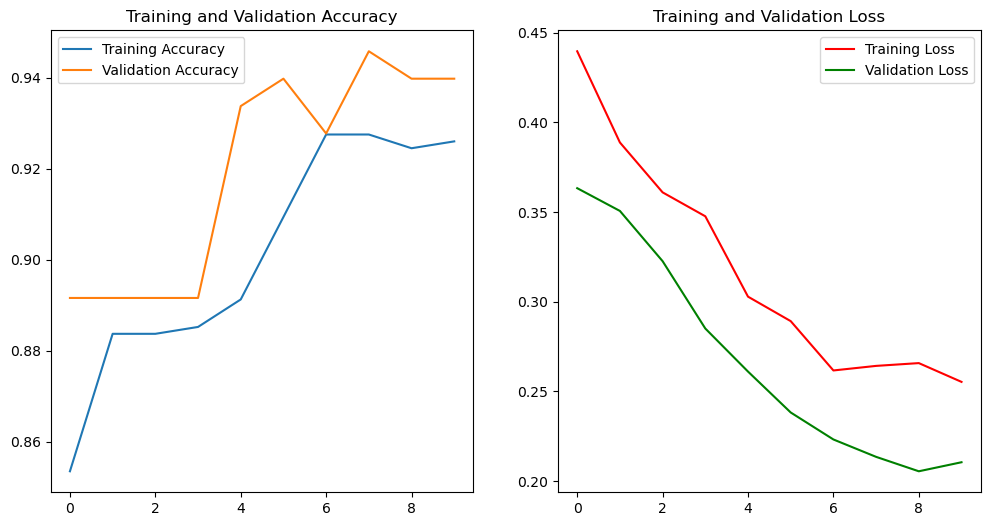

In [22]:
#model setup
model1 = Sequential(name='Model_1')

model1.add(Dense(units=2000, activation='sigmoid', input_shape=(4,)))
model1.add(Dropout(0.9))

model1.add(Dense(units=10, activation='sigmoid'))
model1.add(Dropout(0.2))

model1.add(Dense(1, activation='sigmoid'))

model1.summary()
model1.compile(loss='binary_crossentropy',
    optimizer= 'adam',
    metrics=['accuracy'])

model1_history = model1.fit(x_train, y_train,
                    batch_size=10,
                    epochs=epochs,
                    verbose=0,
                    validation_data=(x_test, y_test))
score1 = model1.evaluate(x_test, y_test, verbose=0)

acc1 = model1_history.history['accuracy']
val_acc1 = model1_history.history['val_accuracy']

loss1 = model1_history.history['loss']
val_loss1 = model1_history.history['val_loss']

print('\nTraining accuracy: {}%'.format(round(acc1[9]*100, 3)))
print('Training loss: {}'.format(round(loss1[9], 3)))
print('Test accuracy: {}%'.format(round(score1[1]*100, 3)))
print('Test loss: {}\n'.format(round(score1[0], 3)))

epochs_range = range(epochs)

plt.style.use('default')
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc1, label='Training Accuracy')
plt.plot(epochs_range, val_acc1, label='Validation Accuracy')
plt.legend(loc='best')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss1, 'r-', label='Training Loss')
plt.plot(epochs_range, val_loss1, 'g-', label='Validation Loss')
plt.legend(loc='best')
plt.title('Training and Validation Loss')
plt.savefig("Model_1.png", dpi=100)

plt.show()

#### <span style="color:navy">2.2 Neural Network 2</span>

Model: "Model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 5000)              25000     
                                                                 
 dropout_2 (Dropout)         (None, 5000)              0         
                                                                 
 dense_4 (Dense)             (None, 500)               2500500   
                                                                 
 dropout_3 (Dropout)         (None, 500)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                5010      
                                                                 
 dropout_4 (Dropout)         (None, 10)                0         
                                                                 
 dense_6 (Dense)             (None, 1)                 11  

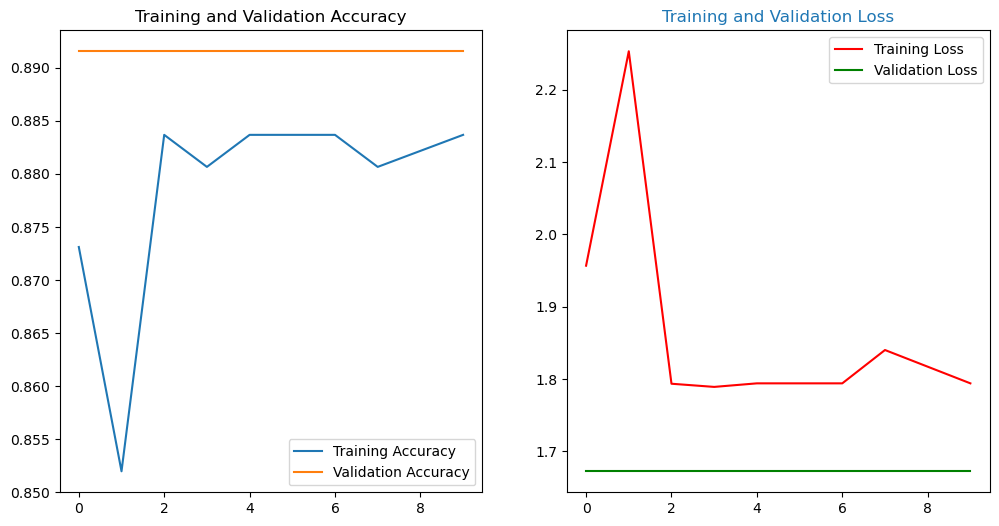

In [23]:
model2 = Sequential(name = 'Model_2')

model2.add(Dense(units=5000, activation='relu', input_shape=(4,)))
model2.add(Dropout(0.8))

model2.add(Dense(units=500, activation='relu', input_shape=(2,)))
model2.add(Dropout(0.2))

model2.add(Dense(units=10, activation='relu'))
model2.add(Dropout(0.1))

model2.add(Dense(1, activation='relu'))

model2.summary()
model2.compile(loss='binary_crossentropy',
    optimizer= 'sgd',
    metrics=['accuracy'])

model2_history = model2.fit(x_train, y_train,
                    batch_size=20,
                    epochs=epochs,
                    verbose=0,
                    validation_data=(x_test, y_test))
score2 = model2.evaluate(x_test, y_test, verbose=0)

acc2 = model2_history.history['accuracy']
val_acc2 = model2_history.history['val_accuracy']

loss2 = model2_history.history['loss']
val_loss2 = model2_history.history['val_loss']

print('\nTraining accuracy: {}%'.format(round(acc2[9]*100, 3)))
print('Training loss: {}'.format(round(loss2[9], 3)))
print('Test accuracy: {}%'.format(round(score2[1]*100, 3)))
print('Test loss: {}\n'.format(round(score2[0], 3)))

epochs_range = range(epochs)

plt.style.use('default')
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc2, label='Training Accuracy')
plt.plot(epochs_range, val_acc2, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss2, "r-", label='Training Loss')
plt.plot(epochs_range, val_loss2, "g-",label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss', color='C0')
plt.savefig("Model_2.png", dpi=100)

plt.show()

#### <span style="color:navy">2.3 Neural Network 3 (using augmented train data)</span>

Model: "Model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 1000)              5000      
                                                                 
 dropout_5 (Dropout)         (None, 1000)              0         
                                                                 
 dense_8 (Dense)             (None, 200)               200200    
                                                                 
 dropout_6 (Dropout)         (None, 200)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                2010      
                                                                 
 dropout_7 (Dropout)         (None, 10)                0         
                                                                 
 dense_10 (Dense)            (None, 1)                 11  

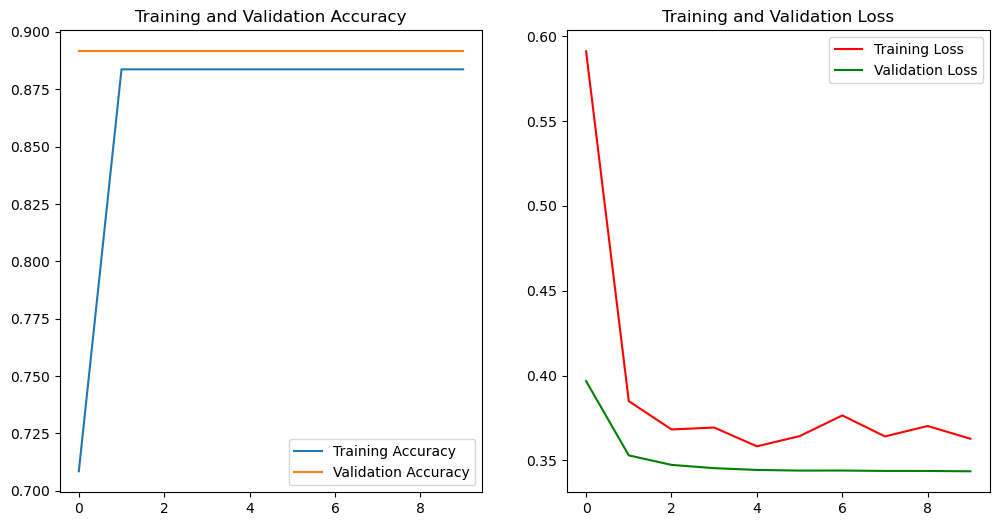

In [24]:
model3 = Sequential(name = 'Model_3')

model3.add(Dense(units=1000, activation='relu', input_shape=(4,)))
model3.add(Dropout(0.9))

model3.add(Dense(units=200, activation='relu', input_shape=(2,)))
model3.add(Dropout(0.2))

model3.add(Dense(units=10, activation='sigmoid'))
model3.add(Dropout(0.1))

model3.add(Dense(1, activation='sigmoid'))

model3.summary()
model3.compile(loss='binary_crossentropy',
    optimizer= 'RMSprop',
    metrics=['accuracy'])

model3_history = model3.fit(x_train, y_train,
                    batch_size=10,
                    epochs=epochs,
                    verbose=0,
                    validation_data=(x_test, y_test))
score3 = model3.evaluate(x_test, y_test, verbose=0)

acc3 = model3_history.history['accuracy']
val_acc3 = model3_history.history['val_accuracy']

loss3 = model3_history.history['loss']
val_loss3 = model3_history.history['val_loss']

print('\nTraining accuracy: {}%'.format(round(acc3[9]*100, 3)))
print('Training loss: {}'.format(round(loss3[9], 3)))
print('Test accuracy: {}%'.format(round(score3[1]*100, 3)))
print('Test loss: {}'.format(round(score3[0], 3)))

epochs_range = range(epochs)

plt.style.use('default')
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc3, label='Training Accuracy')
plt.plot(epochs_range, val_acc3, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss3, 'r-', label='Training Loss')
plt.plot(epochs_range, val_loss3, 'g-', label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig("Model_3.png", dpi=100)

plt.show()

## <span style="color:navy">4. Data Augmentation </span>

In [25]:
from collections import Counter
from sklearn.svm import LinearSVC
from imblearn.pipeline import make_pipeline
from imblearn.base import BaseSampler
from imblearn.over_sampling import (SMOTE, RandomOverSampler)
import imblearn
from imblearn.over_sampling import SMOTE

predictions = np.zeros(len(x_test))

print("Before OverSampling, counts of label '1': {}".format(sum(y["thresholds_reached"] == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y["thresholds_reached"] == 0)))


sm = SMOTE(random_state = 2)
x_train_res, y_train_res = sm.fit_resample(x, y["thresholds_reached"].ravel())

Before OverSampling, counts of label '1': 95
Before OverSampling, counts of label '0': 733 



In [26]:
print('After OverSampling, the shape of train_X: {}'.format(x_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

After OverSampling, the shape of train_X: (1466, 4)
After OverSampling, the shape of train_y: (1466,) 



In [27]:
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, counts of label '1': 733
After OverSampling, counts of label '0': 733


#### **Using baseline prediction**

In [28]:
predictions = np.zeros(len(x_test))

history = model3.fit(x_train_res, y_train_res,
                    batch_size=20,
                    epochs=epochs,
                    verbose=0,
                    validation_data=(x_test, y_test))
score = model3.evaluate(x_test, predictions, verbose=0)
print('Test loss:', score[0])
print('Prediction accuracy:', score[1])

Test loss: 0.5811249017715454
Prediction accuracy: 1.0


#### <span style="color:navy">2.4 Neural Network 4 (using augmented train data)</span>

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 5000)              25000     
                                                                 
 dropout_8 (Dropout)         (None, 5000)              0         
                                                                 
 dense_12 (Dense)            (None, 2000)              10002000  
                                                                 
 dropout_9 (Dropout)         (None, 2000)              0         
                                                                 
 dense_13 (Dense)            (None, 500)               1000500   
                                                                 
 dropout_10 (Dropout)        (None, 500)               0         
                                                                 
 dense_14 (Dense)            (None, 50)                2

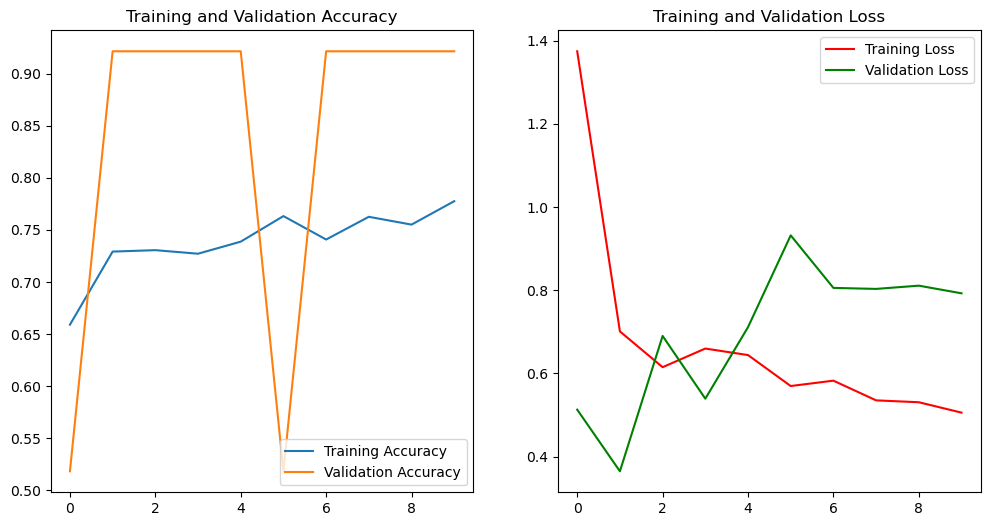

In [29]:
model4 = Sequential()

model4.add(Dense(units=5000, activation='relu', input_shape=(4,)))
model4.add(Dropout(0.9))

model4.add(Dense(units=2000, activation='relu', input_shape=(4,)))
model4.add(Dropout(0.6))

model4.add(Dense(units=500, activation='sigmoid', input_shape=(4,)))
model4.add(Dropout(0.3))

model4.add(Dense(units=50, activation='sigmoid', input_shape=(2,)))
model4.add(Dropout(0.2))

model4.add(Dense(units=5, activation='sigmoid'))
model4.add(Dropout(0.1))

model4.add(Dense(1, activation='relu'))

model4.summary()
model4.compile(loss='binary_crossentropy',
    optimizer= 'adam',
    metrics=['accuracy'])

model4_history = model4.fit(x_train_res, y_train_res,
                    batch_size=20,
                    epochs=epochs,
                    verbose=0,
                    validation_data=(x_test, y_test))
score4 = model4.evaluate(x_test, y_test, verbose=0)

acc4 = model4_history.history['accuracy']
val_acc4 = model4_history.history['val_accuracy']

loss4 = model4_history.history['loss']
val_loss4 = model4_history.history['val_loss']

print('\nTraining accuracy: {}%'.format(round(acc4[9]*100, 3)))
print('Training loss: {}'.format(round(loss4[9], 3)))
print('Test accuracy: {}%'.format(round(score4[1]*100, 3)))
print('Test loss: {}'.format(round(score4[0], 3)))

epochs_range = range(epochs)

plt.style.use('default')
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc4, label='Training Accuracy')
plt.plot(epochs_range, val_acc4, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss4, 'r-', label='Training Loss')
plt.plot(epochs_range, val_loss4, 'g-', label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig("Model_5.png", dpi=100)

plt.show()

#### <span style="color:navy">2.4 Neural Network 5 (model 1using augmented train data)</span>

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 2000)              10000     
                                                                 
 dropout_13 (Dropout)        (None, 2000)              0         
                                                                 
 dense_18 (Dense)            (None, 10)                20010     
                                                                 
 dropout_14 (Dropout)        (None, 10)                0         
                                                                 
 dense_19 (Dense)            (None, 1)                 11        
                                                                 
Total params: 30,021
Trainable params: 30,021
Non-trainable params: 0
_________________________________________________________________

Training accuracy: 80.969%
Training loss: 0.38
Te

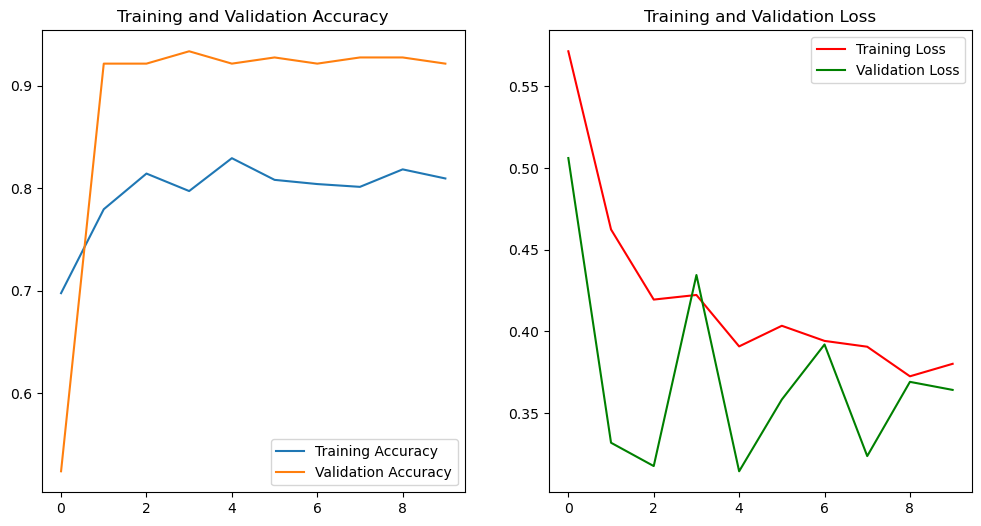

In [30]:
model4 = Sequential()

model4.add(Dense(units=2000, activation='sigmoid', input_shape=(4,)))
model4.add(Dropout(0.9))

model4.add(Dense(units=10, activation='sigmoid'))
model4.add(Dropout(0.2))

model4.add(Dense(1, activation='sigmoid'))

model4.summary()
model4.compile(loss='binary_crossentropy',
    optimizer= 'adam',
    metrics=['accuracy'])

model4_history = model4.fit(x_train_res, y_train_res,
                    batch_size=20,
                    epochs=epochs,
                    verbose=0,
                    validation_data=(x_test, y_test))
score4 = model4.evaluate(x_test, y_test, verbose=0)

acc4 = model4_history.history['accuracy']
val_acc4 = model4_history.history['val_accuracy']

loss4 = model4_history.history['loss']
val_loss4 = model4_history.history['val_loss']

print('\nTraining accuracy: {}%'.format(round(acc4[9]*100, 3)))
print('Training loss: {}'.format(round(loss4[9], 3)))
print('Test accuracy: {}%'.format(round(score4[1]*100, 3)))
print('Test loss: {}'.format(round(score4[0], 3)))

epochs_range = range(epochs)

plt.style.use('default')
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc4, label='Training Accuracy')
plt.plot(epochs_range, val_acc4, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss4, 'r-', label='Training Loss')
plt.plot(epochs_range, val_loss4, 'g-', label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig("Model_1aug.png", dpi=100)

plt.show()

## <span style="color:navy">5. Data visualisation </span>

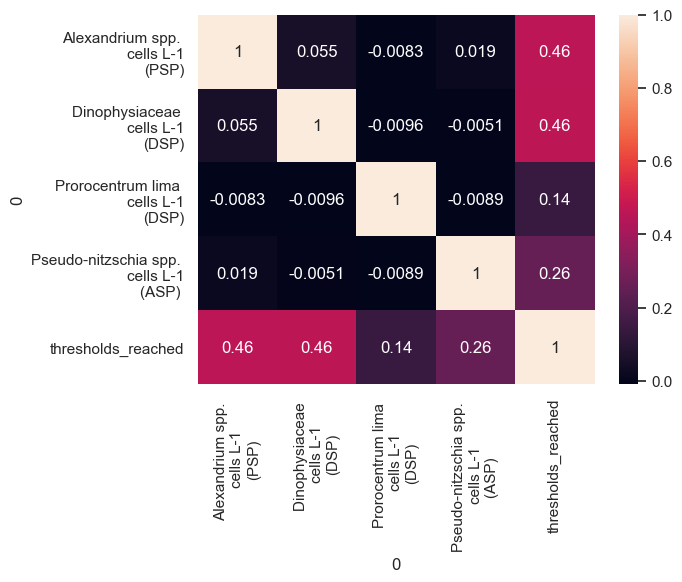

In [31]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()
corrMatrix = plank.corr()
#print (corrMatrix)
ax = sns.heatmap(corrMatrix, annot=True)

## **Model Comparison**

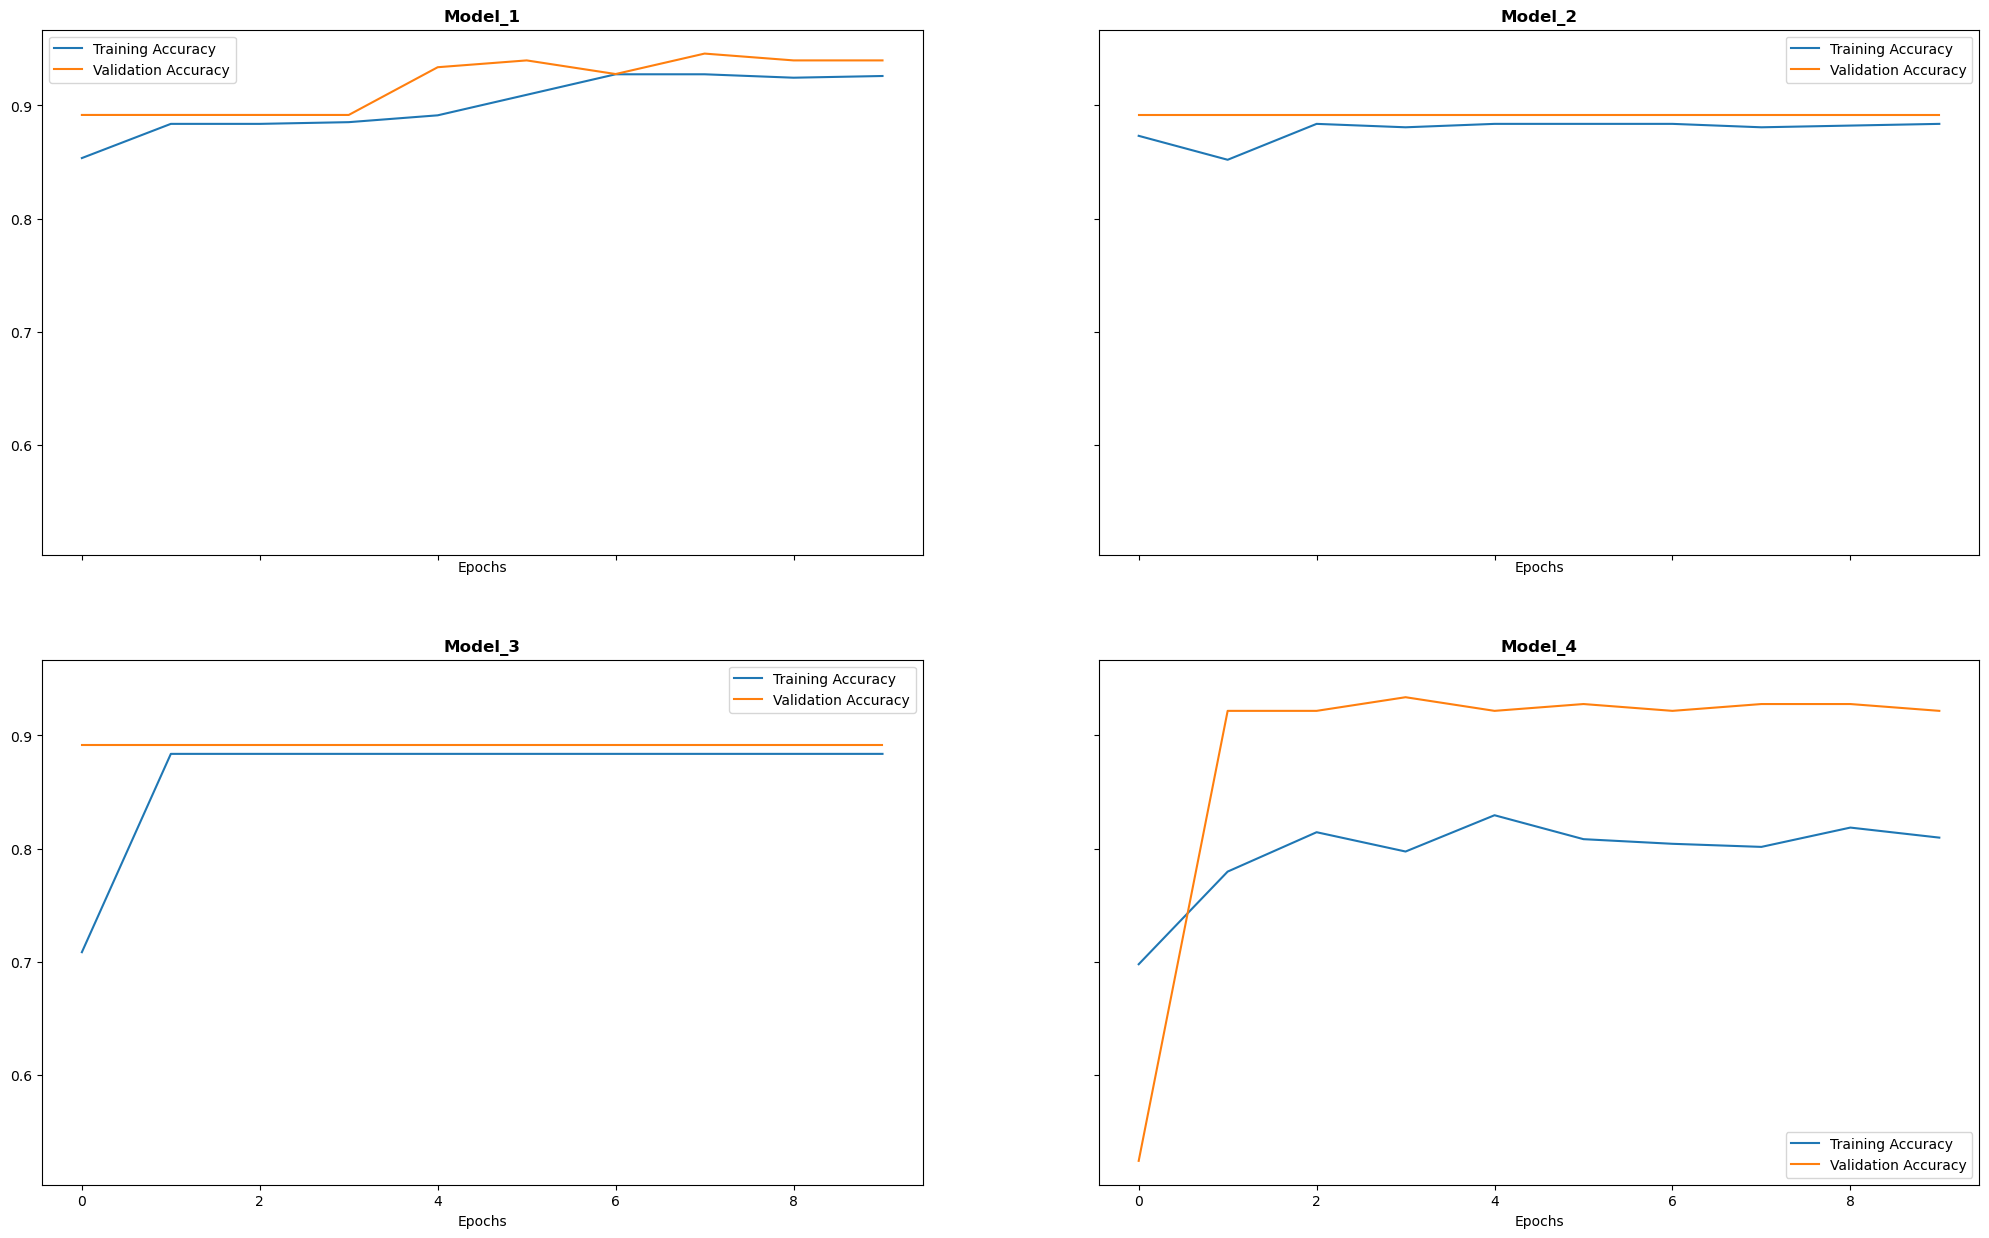

In [32]:
plt.style.use('default')
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True,figsize=(25,15))
ax1, ax2 = axes[0]
ax3, ax4 = axes[1]

ax1.plot(epochs_range, acc1, label='Training Accuracy')
ax1.plot(epochs_range, val_acc1, label='Validation Accuracy')
ax1.legend(loc='best')
ax1.set_title('Model_1', fontweight = 'bold')
ax1.set_xlabel('Epochs')

ax2.plot(epochs_range, acc2, label='Training Accuracy')
ax2.plot(epochs_range, val_acc2, label='Validation Accuracy')
ax2.legend(loc='best')
ax2.set_title('Model_2', fontweight = 'bold')
ax2.set_xlabel('Epochs')

ax3.plot(epochs_range, acc3, label='Training Accuracy')
ax3.plot(epochs_range, val_acc3, label='Validation Accuracy')
ax3.legend(loc='best')
ax3.set_title('Model_3', fontweight = 'bold')
ax3.set_xlabel('Epochs')

ax4.plot(epochs_range, acc4, label='Training Accuracy')
ax4.plot(epochs_range, val_acc4, label='Validation Accuracy')
ax4.legend(loc='best')
ax4.set_title('Model_4', fontweight = 'bold')
ax4.set_xlabel('Epochs')

plt.savefig("Model_Combine.png", dpi=300)
plt.show()

In [33]:
models = pd.DataFrame({
    
    'Model': ['Model 1','Model 2','Model 3','Model 4'],             
    'Training Accuracy': [round(acc1[9], 3),round(acc2[9], 3),round(acc3[9], 3),round(acc4[9], 3)],
    'Training loss': [round(loss1[9], 3), round(loss2[9], 3), round(loss3[9], 3), round(loss4[9], 3)],
    'Test Accuracy': [round(score1[1], 3),round(score2[1], 3),round(score3[1], 3),round(score4[1], 3)],
    'Test loss':[round(score1[0], 3),round(score2[0], 3),round(score3[0], 3),round(score4[0], 3)] 
})


models.sort_values(by='Model', ascending=True)

,Model,Training Accuracy,Training loss,Test Accuracy,Test loss
0,Model 1,0.926,0.255,0.940,0.211
1,Model 2,0.884,1.794,0.892,1.673
2,Model 3,0.884,0.363,0.892,0.344
3,Model 4,0.810,0.380,0.922,0.364


## **Impact of different optimisation function**

## **Model 1 variation - with a different activation function**

Model: "Model_1a"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 1000)              5000      
                                                                 
 dropout_15 (Dropout)        (None, 1000)              0         
                                                                 
 dense_21 (Dense)            (None, 5)                 5005      
                                                                 
 dropout_16 (Dropout)        (None, 5)                 0         
                                                                 
 dense_22 (Dense)            (None, 1)                 6         
                                                                 
Total params: 10,011
Trainable params: 10,011
Non-trainable params: 0
_________________________________________________________________

Training accuracy: 88.369%
Training loss: 0.405
Test 

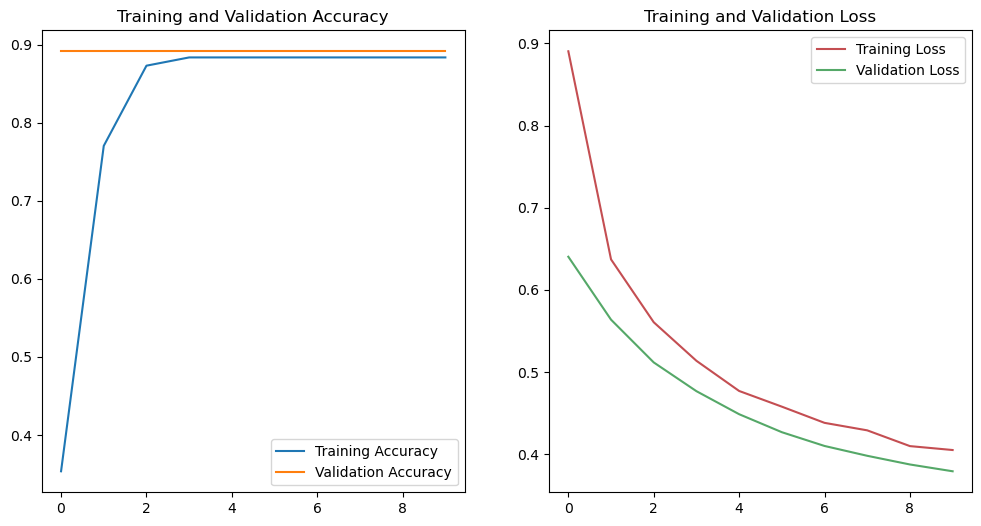

In [34]:
model1a = Sequential(name='Model_1a')

model1a.add(Dense(units=1000, activation='sigmoid', input_shape=(4,)))
model1a.add(Dropout(0.8))

model1a.add(Dense(units=5, activation='sigmoid'))
model1a.add(Dropout(0.2))

model1a.add(Dense(1, activation='sigmoid'))

model1a.summary()
model1a.compile(loss='binary_crossentropy',
    optimizer= 'sgd',
    metrics=['accuracy'])

model1a_history = model1a.fit(x_train, y_train,
                    batch_size=20,
                    epochs=epochs,
                    verbose=0,
                    validation_data=(x_test, y_test))
score1a = model1a.evaluate(x_test, y_test, verbose=0)

acc1a = model1a_history.history['accuracy']
val_acc1a = model1a_history.history['val_accuracy']

loss1a = model1a_history.history['loss']
val_loss1a = model1a_history.history['val_loss']

print('\nTraining accuracy: {}%'.format(round(acc1a[9]*100, 3)))
print('Training loss: {}'.format(round(loss1a[9], 3)))
print('Test accuracy: {}%'.format(round(score1a[1]*100, 3)))
print('Test loss: {}'.format(round(score1a[0], 3)))

epochs_range = range(epochs)

plt.style.use('default')
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc1a, label='Training Accuracy')
plt.plot(epochs_range, val_acc1a, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss1a, 'r-', label='Training Loss')
plt.plot(epochs_range, val_loss1a, 'g-', label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig("Model_1a.png", dpi=100)

plt.show()

## **Modeling with less data**

In [35]:
#using 3 features for model training instead of 4

#taking  "Dinophysiaceae \ncells L-1\n(DSP)" out

x = pd.read_csv('thresholds_cleaned.csv', 
                usecols=["Pseudo-nitzschia spp. \ncells L-1\n(ASP) ",                         
                         "Prorocentrum lima \ncells L-1\n(DSP)", 
                         "Alexandrium spp. \ncells L-1\n(PSP)"], 
                        na_values = ['no info', '.'])
y = pd.read_csv('thresholds_cleaned.csv', 
                usecols=["thresholds_reached"])

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

Creating a threshold dictionary

#### <span style="color:navy">2.1 Neural Network 1</span>

Model: "Model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 2000)              8000      
                                                                 
 dropout_17 (Dropout)        (None, 2000)              0         
                                                                 
 dense_24 (Dense)            (None, 10)                20010     
                                                                 
 dropout_18 (Dropout)        (None, 10)                0         
                                                                 
 dense_25 (Dense)            (None, 1)                 11        
                                                                 
Total params: 28,021
Trainable params: 28,021
Non-trainable params: 0
_________________________________________________________________

Training accuracy: 90.483%
Training loss: 0.325
Test a

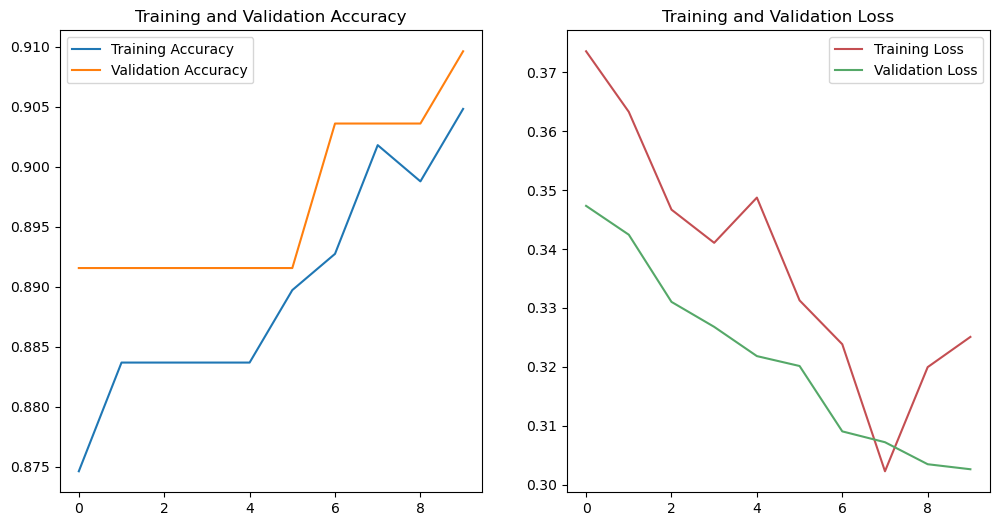

In [37]:
#model setup
model5 = Sequential(name='Model_1')

model5.add(Dense(units=2000, activation='sigmoid', input_shape=(3,)))
model5.add(Dropout(0.9))

model5.add(Dense(units=10, activation='sigmoid'))
model5.add(Dropout(0.2))

model5.add(Dense(1, activation='sigmoid'))

model5.summary()
model5.compile(loss='binary_crossentropy',
    optimizer= 'adam',
    metrics=['accuracy'])

model5_history = model5.fit(x_train, y_train,
                    batch_size=20,
                    epochs=epochs,
                    verbose=0,
                    validation_data=(x_test, y_test))
score5 = model5.evaluate(x_test, y_test, verbose=0)

acc5 = model5_history.history['accuracy']
val_acc5 = model5_history.history['val_accuracy']

loss5 = model5_history.history['loss']
val_loss5 = model5_history.history['val_loss']

print('\nTraining accuracy: {}%'.format(round(acc5[9]*100, 3)))
print('Training loss: {}'.format(round(loss5[9], 3)))
print('Test accuracy: {}%'.format(round(score5[1]*100, 3)))
print('Test loss: {}'.format(round(score5[0], 3)))

epochs_range = range(epochs)

plt.style.use('default')
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc5, label='Training Accuracy')
plt.plot(epochs_range, val_acc5, label='Validation Accuracy')
plt.legend(loc='best')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss5, 'r-', label='Training Loss')
plt.plot(epochs_range, val_loss5, 'g-',  label='Validation Loss')
plt.legend(loc='best')
plt.title('Training and Validation Loss')
plt.savefig("Model_5.png", dpi=100)

plt.show()